In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0
    self.s2 = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    if(self.N>1):
        self.s2 = ((self.N-2)/(self.N-1))*self.s2 + (x-self.mean)*(x-self.mean)/self.N 
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [114]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  mean1 = np.empty(N)
  mean2 = np.empty(N)
  mean3 = np.empty(N)
  var1 = np.empty(N)
  var2 = np.empty(N)
  var3 = np.empty(N)
  var_diff = np.empty(N)
  var_avg = np.empty(N)
  max_var = np.empty(N)
  bandit_pull = np.empty(N)
    
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    # if p < eps:
    #  j = np.random.choice(3)
    #else:
     # j = np.argmax([b.mean for b in bandits])
    #x = bandits[j].pull()
    #bandits[j].update(x)
    
    if i < 300:  # 30 is pretty arbitrary
        j = np.random.choice(3) #pure exploration
    elif i < 1200:
        if var_diff[i] < .1:
            
            if p < .005:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
        if var_diff[i] < .25:
            
            if p < .01:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
        elif var_diff[i] < .5:
            if p < .1:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
           
        elif var_diff[i] < 1:
            if p < .33:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
       
        else:
            if p < .67:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
    else:
        j = np.argmax([b.mean for b in bandits])
    bandit_pull[i] = j  
    x = bandits[j].pull()
    bandits[j].update(x)
    
    # for the plot
    data[i] = x
    mean1[i] = bandits[0].mean
    mean2[i] = bandits[1].mean
    mean3[i] = bandits[2].mean
    var1[i] = bandits[0].s2
    var2[i] = bandits[1].s2
    var3[i] = bandits[2].s2
    var_diff[i] = (max(var1[i],var2[i],var3[i]) - min(var1[i],var2[i],var3[i]))
    max_var[i] = max(var1[i],var2[i],var3[i])
    max_var_diff = 1
    if var_diff[i] > max_var_diff:
        max_var_diff = var_diff[i]
    if i > 30:
        var_avg[i] = np.mean(var_diff[(i-30):i])/max_var_diff * .5
    else:
        var_avg[i] = 1
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  allthecrap = [cumulative_average,mean1,mean2,mean3,var1,var2,var3,var_diff, var_avg, bandit_pull]  
  return allthecrap

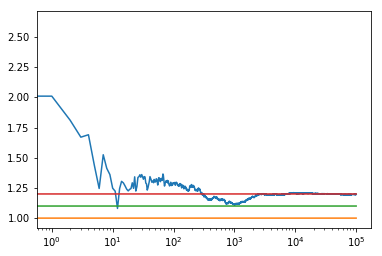

1.0540808306592189
1.1118923359806812
1.1971416577056986


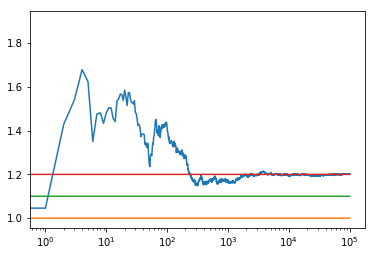

0.9944031019106752
1.1840918888934668
1.2028488449839998


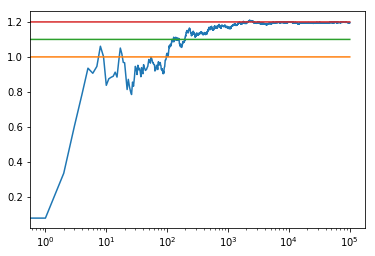

0.9669347172307862
1.145566639504759
1.196200039720901


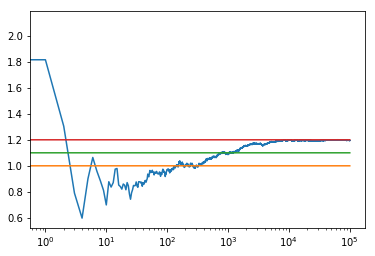

1.000624786660386
0.9741652108443384
1.1962115276940806


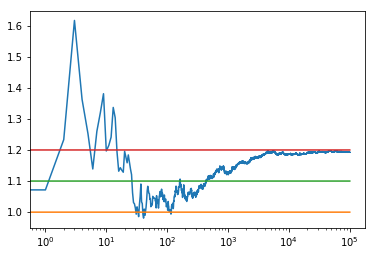

1.0467180222124846
1.0076592417842578
1.1933089330599467


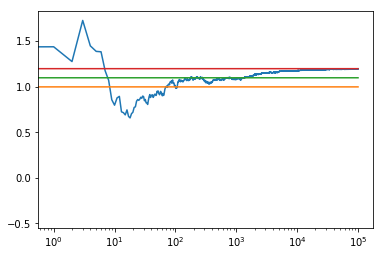

0.9429887734135686
1.0628354703837626
1.197997103335006


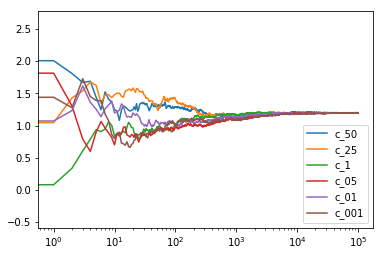

In [119]:
if __name__ == '__main__':
  c_50 = run_experiment(1.0,1.1,1.2, 0.33, 100000)
  c_25 = run_experiment(1.0,1.1,1.2, 0.3, 100000)  
  c_1 = run_experiment(1.0,1.1,1.2, 0.25, 100000)
  c_05 = run_experiment(1.0,1.1,1.2, 0.2, 100000)
  c_01 = run_experiment(1.0,1.1,1.2, 0.15, 100000)
  c_001 = run_experiment(1.0,1.1,1.2, 0.12, 100000)
  
  # log scale plot
  plt.plot(c_50[0], label='c_50')
  plt.plot(c_25[0], label='c_25')
  plt.plot(c_1[0], label='c_1')
  plt.plot(c_05[0], label='c_05')
  plt.plot(c_01[0], label='c_01')
  plt.plot(c_001[0], label='c_001')  
  plt.legend()
  plt.xscale('log')
  plt.show()

  #plt.plot(c_1[4], label='eps = 0.1')
  #plt.plot(c_05[4], label='eps = 0.1')
  #plt.plot(c_01[4], label='eps = 0.1')
  #plt.plot(c_001[4], label='eps = 0.1')
  #plt.legend()
  #plt.xscale('log')
  #plt.show()


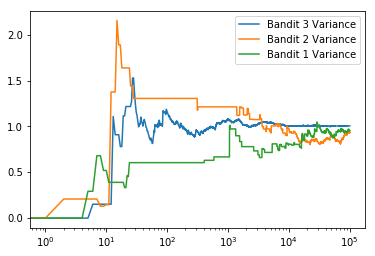

In [11]:
plt.plot(c_05[6], label='Bandit 3 Variance')
plt.plot(c_05[5], label='Bandit 2 Variance')
plt.plot(c_05[4], label='Bandit 1 Variance')
plt.legend()
plt.xscale('log')
plt.show()

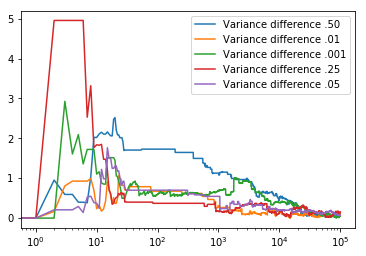

In [12]:
plt.plot(c_50[7], label='Variance difference .50')
plt.plot(c_01[7], label='Variance difference .01')
plt.plot(c_001[7], label='Variance difference .001')
plt.plot(c_25[7], label='Variance difference .25')
plt.plot(c_05[7], label='Variance difference .05')
plt.legend()
plt.xscale('log')
plt.show()

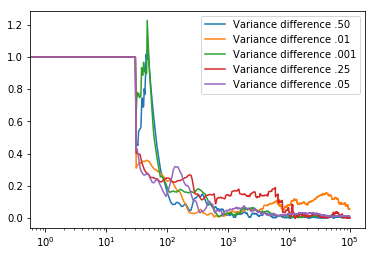

In [76]:
plt.plot(c_50[8], label='Variance difference .50')
plt.plot(c_01[8], label='Variance difference .01')
plt.plot(c_001[8], label='Variance difference .001')
plt.plot(c_25[8], label='Variance difference .25')
plt.plot(c_05[8], label='Variance difference .05')
plt.legend()
plt.xscale('log')
plt.show()

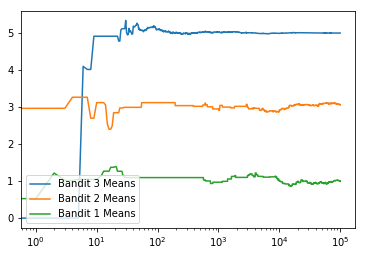

In [14]:
plt.plot(c_50[3], label='Bandit 3 Means')
plt.plot(c_50[2], label='Bandit 2 Means')
plt.plot(c_50[1], label='Bandit 1 Means')
plt.legend()
plt.xscale('log')
plt.show()

In [15]:
10/77

0.12987012987012986

In [16]:
.13*5500

715.0

In [17]:
max(1,5,6)

6

In [18]:
np.mean((1,2,3,4,3,3,3,5))

3.0

In [19]:
i=5
array=[2,344,56,54,65,4,3,54]
np.mean(array[(i-5):i])

104.2

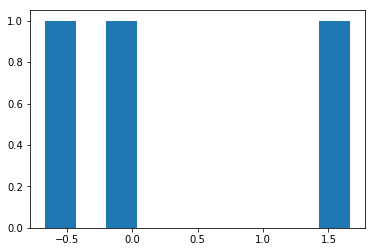

In [158]:
N = 3
dist = (np.random.randn(N)+1.05)
mean = sum(dist)/N
plt.hist(dist)
plt.show()

In [159]:
mean

0.27292694590132216

In [ ]:
   if i < 300:  # 30 is pretty arbitrary
        j = np.random.choice(3) #pure exploration
    else:
        if var_diff[i] < .1:
            
            if p < .005:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
        if var_diff[i] < .25:
            
            if p < .01:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
        elif var_diff[i] < .5:
            if p < .1:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
           
        elif var_diff[i] < 1:
            if p < .33:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])
           
        elif N > 1200: #nearly 
            
                 j = np.argmax([b.mean for b in bandits])
       
        else:
            if p < .01:
                 j = np.random.choice(3)
            else:
                 j = np.argmax([b.mean for b in bandits])

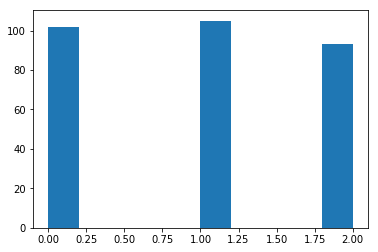

In [120]:
first_300 = c_05[9][0:300]
middle = c_05[9][301:1200]
end = c_05[9][1200:-1]

plt.hist(first_300)
plt.show()

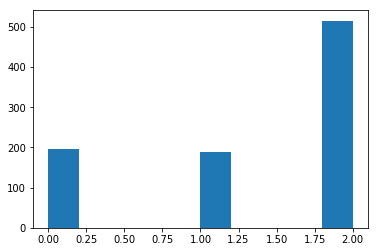

In [121]:
plt.hist(middle)
plt.show()

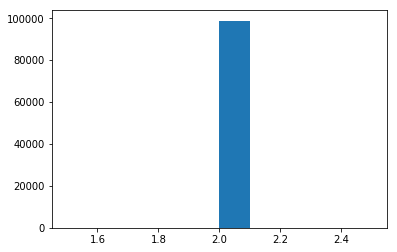

In [122]:
plt.hist(end)
plt.show()

In [104]:
end

[]

In [123]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  mean1 = np.empty(N)
  mean2 = np.empty(N)
  mean3 = np.empty(N)
  var1 = np.empty(N)
  var2 = np.empty(N)
  var3 = np.empty(N)
  var_diff = np.empty(N)
  var_avg = np.empty(N)
  max_var = np.empty(N)
  bandit_pull = np.empty(N)
    
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)
    
    
    
    # for the plot
    data[i] = x
    mean1[i] = bandits[0].mean
    mean2[i] = bandits[1].mean
    mean3[i] = bandits[2].mean
    var1[i] = bandits[0].s2
    var2[i] = bandits[1].s2
    var3[i] = bandits[2].s2
    var_diff[i] = (max(var1[i],var2[i],var3[i]) - min(var1[i],var2[i],var3[i]))
    max_var[i] = max(var1[i],var2[i],var3[i])
    max_var_diff = 1
    if var_diff[i] > max_var_diff:
        max_var_diff = var_diff[i]
    if i > 30:
        var_avg[i] = np.mean(var_diff[(i-30):i])/max_var_diff * .5
    else:
        var_avg[i] = 1
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  allthecrap = [cumulative_average,mean1,mean2,mean3,var1,var2,var3,var_diff, var_avg, bandit_pull]  
  return allthecrap

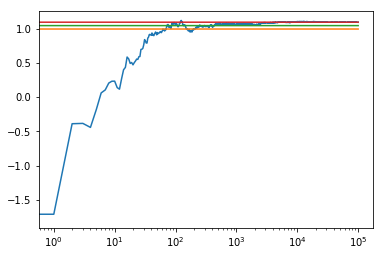

0.8393635740436427
1.0414816781510714
1.098274446152628


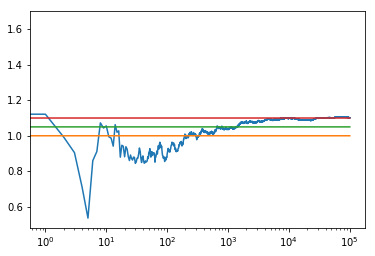

0.9410153005561057
1.04754800478986
1.1018966780767605


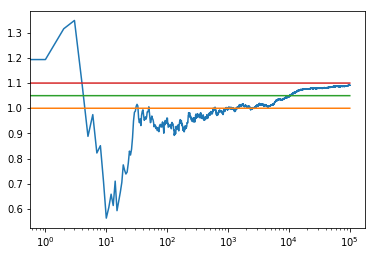

1.004149348863998
0.9886242688096781
1.0960301639522798


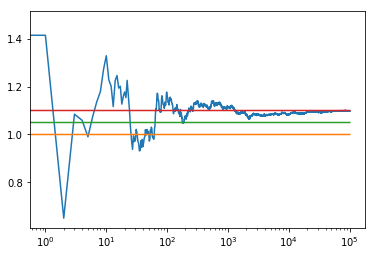

1.0211407625788584
1.012775038332947
1.1011673569711995


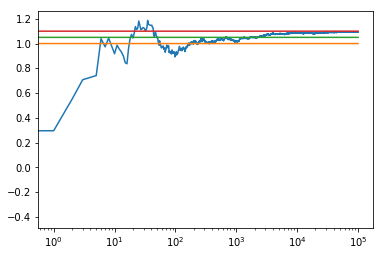

0.9888750221783287
1.0609493348036254
1.0989352706944673


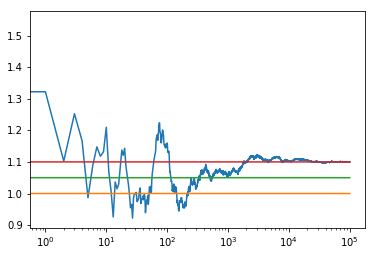

1.017700377789005
1.0586242579228577
1.1078646581239704


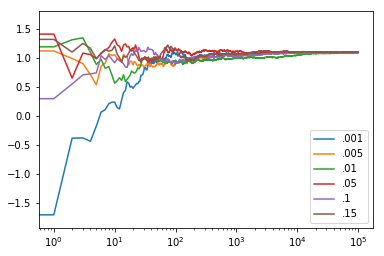

In [126]:
if __name__ == '__main__':
  c_50 = run_experiment(1.0,1.05,1.1, .001, 100000)
  c_25 = run_experiment(1.0,1.05,1.1,.005, 100000)  
  c_1 = run_experiment(1.0,1.05,1.1, .01, 100000)
  c_05 = run_experiment(1.0,1.05,1.1,.05, 100000)
  c_01 = run_experiment(1.0,1.05,1.1, .1, 100000)
  c_001 = run_experiment(1.0,1.05,1.1, .15, 100000)
  
  # log scale plot
  plt.plot(c_50[0], label='.001')
  plt.plot(c_25[0], label='.005')
  plt.plot(c_1[0], label='.01')
  plt.plot(c_05[0], label='.05')
  plt.plot(c_01[0], label='.1')
  plt.plot(c_001[0], label='.15')  
  plt.legend()
  plt.xscale('log')
  plt.show()

  #plt.plot(c_1[4], label='eps = 0.1')
  #plt.plot(c_05[4], label='eps = 0.1')
  #plt.plot(c_01[4], label='eps = 0.1')
  #plt.plot(c_001[4], label='eps = 0.1')
  #plt.legend()
  #plt.xscale('log')
  #plt.show()

